# Homework #2: Error analysis of the quadratic formula solution
## Function definition
first we define our function based on a given/random a,b,c values and graph it 

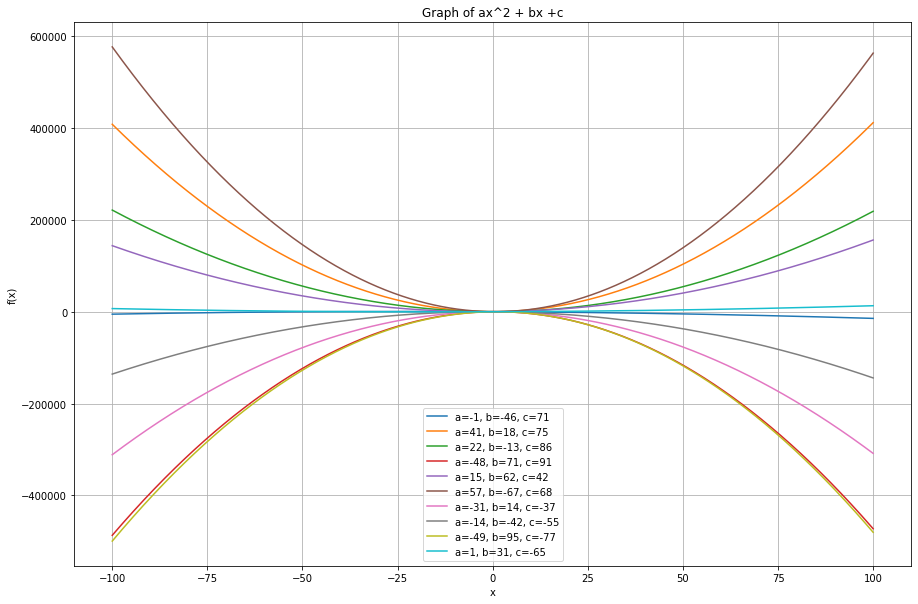

<function matplotlib.pyplot.show(*args, **kw)>

In [55]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

def f(x,a,b,c):
    f = (a*x**2)+(b*x)+c
    return f

plt.figure (figsize=(15,10))
x = np.arange(-100, 100, 0.01)
for i in range(10):
    a= random.randint(-100,100)
    b= random.randint(-100,100)
    c= random.randint(-100,100)
    y = f(x,a,b,c) #Change a, b, c here 
    plt.plot(x,y,label = "a=" +str(a)+", b=" +str(b)+", c="+str(c))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graph of ax^2 + bx +c")
plt.legend()
plt.grid()
plt.show()
plt.show


## Function for a= 1 , b=1 , c = 10^-n where n= 1,2,3,4...
we loop the function and graph for the given a, b, and c values

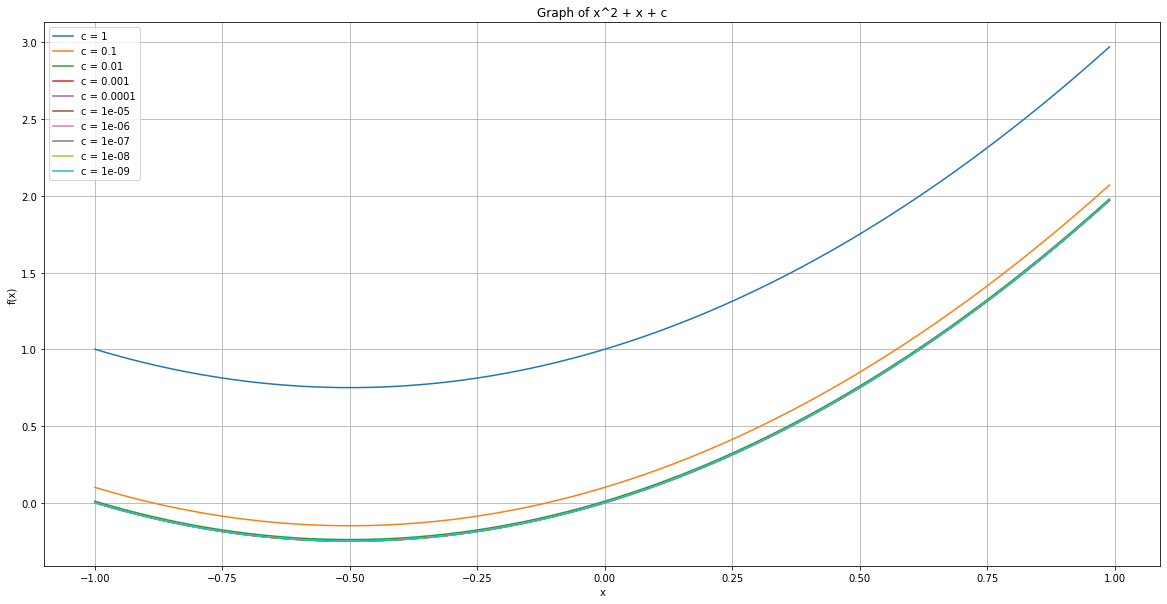

<function matplotlib.pyplot.show(*args, **kw)>

In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math


def f(x,a,b,c):
    f = (a*x**2)+(b*x)+c
    return f
plt.figure(figsize=(20,10))
x = np.arange(-1, 1, 0.01)
for n in range(10):

    c = 10**(-n)
    y = f(x,1,1,c)
    plt.plot(x,y,label = 'c = '+str(c))

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Graph of x^2 + x + c")

plt.legend()
plt.grid()
plt.show()
plt.show

## Define a function to find the solutions
prompt: "a. Write a program that calculates all four solutions for arbitrary values of a, b, and c."
**x3 and x4 in the function give us more accurate values and will be assumed as the correct value of the root, this is because we go around the subtraction error by adding the b^2-4ac term to b rather than subtracting**

In [108]:
def solution(a,b,c):
    x1= (-b + np.sqrt(b**2-4*a*c))/(2*a)
    x2= (-b - np.sqrt(b**2-4*a*c))/(2*a)
    
    x3= (-2*c)/(b+np.sqrt(b**2-4*a*c))
    x4= (-2*c)/(b-np.sqrt(b**2-4*a*c))
    return x1 ,x2 ,x3, x4



The Solution Function is function which takes on the parameter of a, b, and c and finds the 4 solutions, two based on one definition of solving a quadratic and the other 2 from the other definition.

**The are more interested in x1, x4 in the solution function (x1 and x2' below), because they are the analytical solutions which encounter the subraction cancelation as b^2 >>4ac**

## Error analysis as c decreases
Prompt: "b) Investigate how errors in your computed answers become large as the subtractive
cancellation increases and relate this to the known machine precision. (Hint: A good test case employs a = 1, b = 1, c = 10−n, n = 1,2,3,....)

In [109]:
errorlist=[]
clist =[]
for n in range(20):
    c = 10**(-n)
    x1,x2,x3,x4 = solution(1,1,c)
    errorlist.append(abs((x2-x4)/x4)*100)
    clist.append(c)
    print("relative error between x2 and x2': ",abs((x2-x4)/x4*100),"%")
    print ("c=",c)
    print ("x1= %.31f, x2=%.31f"%(x1,x2) + "\n" + "x1'= %.31f, x2'=%.31f"%(x3,x4))
    print ('\n')

relative error between x2 and x2':  nan %
c= 1
x1= nan, x2=nan
x1'= nan, x2'=nan


relative error between x2 and x2':  1.2512398381765244e-14 %
c= 0.1
x1= -0.1127016653792582978610425925581, x2=-0.8872983346207417021389574074419
x1'= -0.1127016653792583117388304003725, x2'=-0.8872983346207418131612598699576


relative error between x2 and x2':  2.0187954195067715e-13 %
c= 0.01
x1= -0.0101020514433644015284130546206, x2=-0.9898979485566355984715869453794
x1'= -0.0101020514433643807117313428989, x2'=-0.9898979485566336000701426200976


relative error between x2 and x2':  2.4227113325842694e-12 %
c= 0.001
x1= -0.0010010020050140178149433722865, x2=-0.9989989979949860376962078589713
x1'= -0.0010010020050140421010720359618, x2'=-0.9989989979950102405581446873839


relative error between x2 and x2':  5.562773686379228e-12 %
c= 0.0001
x1= -0.0001000100020004945911011873250, x2=-0.9998999899979994498977475814172
x1'= -0.0001000100020005001476373213132, x2'=-0.9998999899980550720712813017599




/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: inv

### Analysis
As we can see, when c is in the order of magnitude 1e-17 when the x1 and x2' experience the subtraction cancellation error and give results of **zero** and **inf** respectively. this can be seen as a result of 1=1+e where e is the machine precision and this is consistent with our results. Also the relative error between x2 and x2' increases as 4ac becomes smaller and smaller relative to b^2 and **shows an error differnce of 11% when c= 1e-16**

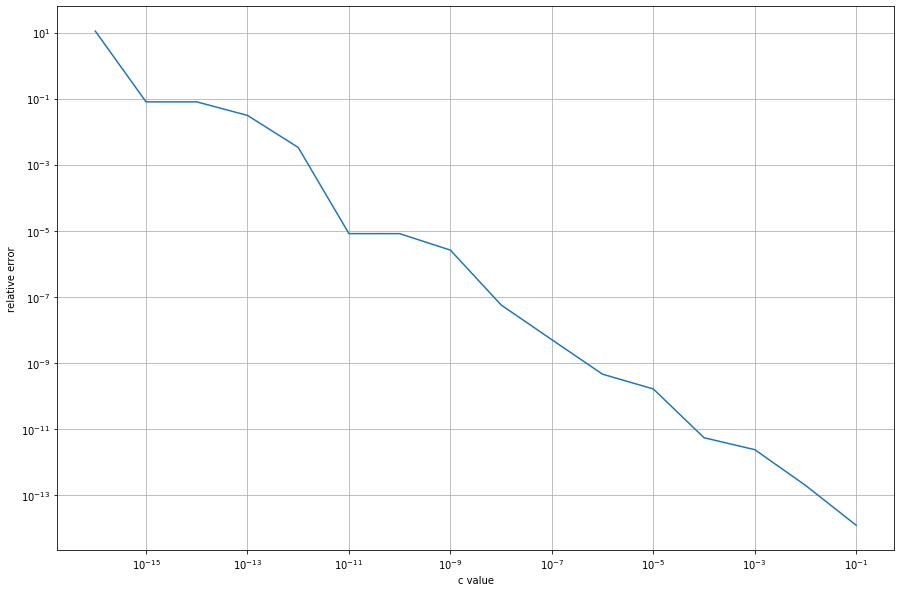

<function matplotlib.pyplot.show(*args, **kw)>

In [110]:
plt.figure(figsize=(15,10))
plt.plot(clist,errorlist)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('c value')
plt.ylabel('relative error')
plt.grid()
plt.show()
plt.show

## Program Extension
Prompt: "c. Extend your program so that it indicates the most precise solutions."

because we experience the error as b^2 >>4ac, we will incorporate an "if clause" and a tolerance of acceptance of %5

In [120]:
def solution1(a,b,c):
    x1= (-b + np.sqrt(b**2-4*a*c))/(2*a)
    x2= (-b - np.sqrt(b**2-4*a*c))/(2*a)
    
    x3= (-2*c)/(b+np.sqrt(b**2-4*a*c))
    x4= (-2*c)/(b-np.sqrt(b**2-4*a*c))
    

    return x1,x2,x3,x4


In [123]:
errorlist=[]
clist =[]
for n in range(20):
    c = 10**(-n)
    x1,x2,x3,x4 = solution1(1,1,c)
    
    if abs((x2-x4)/x4) > .05:     #here the tolerance is defined
        print("Error is greater than 5% for c=",c)
        
        break
    
    
    errorlist.append(abs((x2-x4)/x4)*100)
    clist.append(c)
    print("relative error between x2 and x2': ",abs((x2-x4)/x4)*100,"%")
    print ("c=",c)
    print ("x1= %.31f, x2=%.31f"%(x1,x2) + "\n" + "x1'= %.31f, x2'=%.31f"%(x3,x4))
    print ('\n')

relative error between x2 and x2':  nan %
c= 1
x1= nan, x2=nan
x1'= nan, x2'=nan


relative error between x2 and x2':  1.2512398381765244e-14 %
c= 0.1
x1= -0.1127016653792582978610425925581, x2=-0.8872983346207417021389574074419
x1'= -0.1127016653792583117388304003725, x2'=-0.8872983346207418131612598699576


relative error between x2 and x2':  2.0187954195067715e-13 %
c= 0.01
x1= -0.0101020514433644015284130546206, x2=-0.9898979485566355984715869453794
x1'= -0.0101020514433643807117313428989, x2'=-0.9898979485566336000701426200976


relative error between x2 and x2':  2.4227113325842694e-12 %
c= 0.001
x1= -0.0010010020050140178149433722865, x2=-0.9989989979949860376962078589713
x1'= -0.0010010020050140421010720359618, x2'=-0.9989989979950102405581446873839


relative error between x2 and x2':  5.562773686379228e-12 %
c= 0.0001
x1= -0.0001000100020004945911011873250, x2=-0.9998999899979994498977475814172
x1'= -0.0001000100020005001476373213132, x2'=-0.9998999899980550720712813017599




/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """
/Users/farazmost/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
